NAMA : Yusuf Surya Tryantono

NIM : 1301174268 ; Kelas : IF 41-12


---



Metode yang digunakan ialah metode K-means yang dimana dalah tipe learning di mana kita hanya mempunyai data masukan (input data) tetapi tidak ada output variable yang berhubungan.


Goal dari unsupervised learning adalah untuk memodelkan struktur dasar atau distribusi dalam data dengan tujuan untuk mempelajari data lebih jauh lagi, dengan kata lain, adalah menyimpulkan fungsi yang mendeskripsikan atau menjelaskan data.
Berbeda dengan supervised learning, di sini tidak ada jawaban yang ‘dibenarkan secara terarah’ dan tidak ada ‘guru’. Algoritma dibiarkan dengan rancangannya sendiri untuk mengetahui dan menyajikan struktur menarik yang ada dalam data.



# Upload Dataset

Pada permodelan clustering kali ini diberikan dua eksperimen yang berbeda terhadap model dengan membedakan fitur yang diambil dari dataset 3 "used_cars"

Pada eksperimen ini, fitur clustering yang dipakai ialah "year" dan "odometer". Odometer yang dimana merupakan jarak tempuh jauh mobil dalam masa pemakaian, sementara year ialah waktu lamanya dipakai mobil itu oleh pemiliknya.

**Libray yang akan digunakan**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
from copy import deepcopy
from pandas.plotting import scatter_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
import random as rd
warnings.filterwarnings('ignore')
%matplotlib inline

Baca Dataset

In [0]:
df = pd.read_csv('used_cars.csv')

In [122]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 926 entries, 0 to 925
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    926 non-null    int64  
 1   id            926 non-null    int64  
 2   url           926 non-null    object 
 3   region        926 non-null    object 
 4   region_url    926 non-null    object 
 5   price         926 non-null    int64  
 6   year          915 non-null    float64
 7   manufacturer  882 non-null    object 
 8   model         916 non-null    object 
 9   condition     470 non-null    object 
 10  cylinders     691 non-null    object 
 11  fuel          905 non-null    object 
 12  odometer      797 non-null    float64
 13  title_status  913 non-null    object 
 14  transmission  920 non-null    object 
 15  vin           634 non-null    object 
 16  drive         763 non-null    object 
 17  size          256 non-null    object 
 18  type          743 non-null    

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,0,7034441763,https://saltlakecity.craigslist.org/cto/d/salt...,salt lake city,https://saltlakecity.craigslist.org,17899,2012.0,volkswagen,golf r,excellent,4 cylinders,gas,63500.0,clean,manual,WVWPF7AJ6CW316713,4wd,compact,hatchback,black,https://images.craigslist.org/00G0G_fTLDWM5Xyv...,PRICE REDUCED! -Garage kept -Low Miles (63K)...,NaN,ut,40.7372,-111.858
1,1,7034440610,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTMF1EP3GKF13544,4wd,NaN,NaN,NaN,https://images.craigslist.org/00v0v_7Cu0buIofU...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
2,2,7034440588,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,46463,2015.0,gmc,sierra 1500,excellent,NaN,gas,7554.0,clean,automatic,3GTU2WEC6FG228025,4wd,NaN,NaN,white,https://images.craigslist.org/01515_lPvJ9bfbdY...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
3,3,7034440546,https://saltlakecity.craigslist.org/ctd/d/sand...,salt lake city,https://saltlakecity.craigslist.org,0,2016.0,ford,f-150,excellent,NaN,gas,10.0,clean,automatic,1FTEX1EF6GKD25447,4wd,NaN,NaN,NaN,https://images.craigslist.org/00T0T_6Rjfp3NS4O...,Drive it home today. Call (Or Text) us now !!C...,NaN,ut,40.5881,-111.884
4,4,7034406932,https://saltlakecity.craigslist.org/ctd/d/evan...,salt lake city,https://saltlakecity.craigslist.org,49999,2018.0,ford,f-450,NaN,NaN,diesel,70150.0,clean,automatic,1FT8W4DT8GEA90427,4wd,NaN,pickup,white,https://images.craigslist.org/00W0W_8yIUwRBXXd...,2018 Ford F-350 F350 F 350 SD Lariat Crew Cab ...,NaN,ut,40.3744,-104.694


Cek dataset

In [123]:
df.describe()

,Unnamed: 0,id,price,year,odometer,county,lat,long
count,926.000000,9.260000e+02,926.000000,915.000000,7.970000e+02,0.0,901.000000,901.000000
mean,462.500000,7.042470e+09,15560.161987,2009.759563,9.925998e+04,NaN,39.215274,-101.545518
std,267.457473,6.421614e+06,12272.597114,8.868175,7.788474e+04,NaN,3.442223,18.463662
min,0.000000,7.032623e+09,0.000000,1931.000000,0.000000e+00,NaN,9.019050,-155.901000
25%,231.250000,7.036767e+09,6500.000000,2007.000000,5.195400e+04,NaN,37.136400,-113.608000
50%,462.500000,7.042337e+09,11996.000000,2012.000000,9.105200e+04,NaN,37.175600,-113.523000
75%,693.750000,7.049240e+09,22365.750000,2015.000000,1.313370e+05,NaN,42.887400,-73.249200
max,925.000000,7.050085e+09,105500.000000,2020.000000,1.350000e+06,NaN,53.032400,-71.040000


In [124]:
df = df.drop(columns=['Unnamed: 0','id','url','region','title_status','vin','region_url', 'image_url', 'lat', 'long','manufacturer','model','county','description'])
df.head()

,price,year,condition,cylinders,fuel,odometer,transmission,drive,size,type,paint_color,state
0,17899,2012.0,excellent,4 cylinders,gas,63500.0,manual,4wd,compact,hatchback,black,ut
1,0,2016.0,excellent,NaN,gas,10.0,automatic,4wd,NaN,NaN,NaN,ut
2,46463,2015.0,excellent,NaN,gas,7554.0,automatic,4wd,NaN,NaN,white,ut
3,0,2016.0,excellent,NaN,gas,10.0,automatic,4wd,NaN,NaN,NaN,ut
4,49999,2018.0,NaN,NaN,diesel,70150.0,automatic,4wd,NaN,pickup,white,ut


Membatasi data year, yang dimana hanya membaca mobil diatas tahun 1985.

In [125]:
df = df[df.year > 1985]
df.shape

(896, 12)

In [126]:
df.odometer.quantile(.999)

801880.0000000466

Membatas data odometer, yang dimana hanya membaca data mobil yang telah dipakai Maximal 499999

In [127]:
df = df[~(df.odometer > 500000)]
df.shape

(893, 12)

In [128]:
df.info

<bound method DataFrame.info of      price    year  condition  ...       type paint_color  state
0    17899  2012.0  excellent  ...  hatchback       black     ut
1        0  2016.0  excellent  ...        NaN         NaN     ut
2    46463  2015.0  excellent  ...        NaN       white     ut
3        0  2016.0  excellent  ...        NaN         NaN     ut
4    49999  2018.0        NaN  ...     pickup       white     ut
..     ...     ...        ...  ...        ...         ...    ...
919   7900  2013.0  excellent  ...        NaN       black     vt
920   3595  2008.0   like new  ...      wagon        blue     vt
921   2900  2007.0  excellent  ...      sedan        grey     vt
924   4000  2006.0       good  ...        SUV        blue     vt
925  17995  2018.0        NaN  ...        NaN         NaN    NaN

[893 rows x 12 columns]>

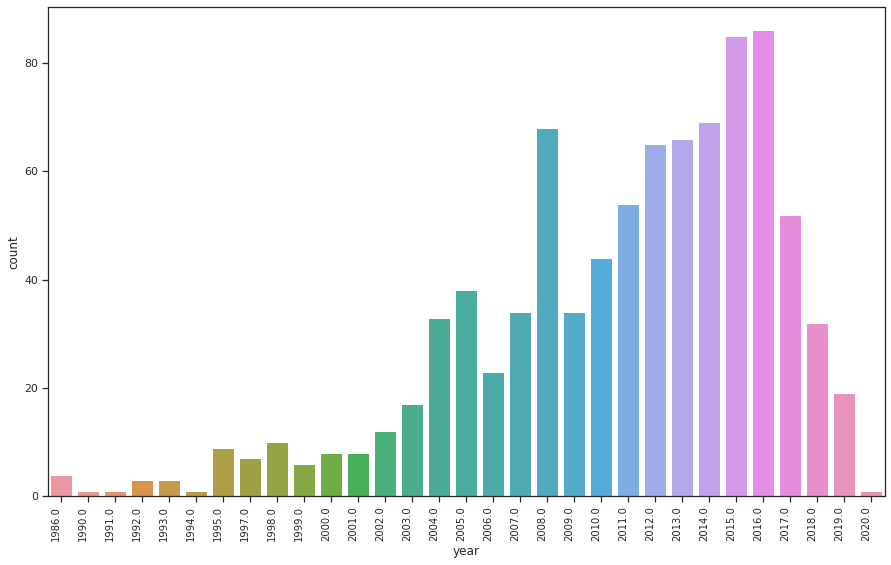

In [129]:
plt.figure(figsize=(15,9))
ax = sns.countplot(x='year',data=df);
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right",fontsize=10);

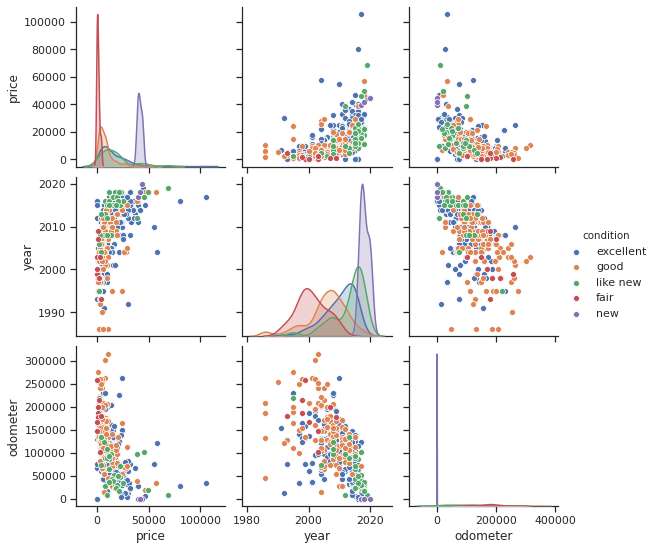

In [130]:
sns.set(style="ticks", color_codes=True)
sns.pairplot(df, hue="condition");



---



# Menghapus Outlier yang tidak terpaki

Bertujuan untuk menghapus outlier yang tidak terpakai karena sangat berbda jauh dengan yang lainnya.

In [131]:
!pip install scikit-learn

 Menghapus data yang kosong

In [0]:
df['year'].replace('', np.nan, inplace=True)
df['odometer'].replace('', np.nan, inplace=True)

In [0]:
df.dropna(subset=['year'], inplace=True)
df.dropna(subset=['odometer'], inplace=True)

In [0]:
df = df[['odometer','year']]

In [135]:
display(df)

,odometer,year
0,63500.0,2012.0
1,10.0,2016.0
2,7554.0,2015.0
3,10.0,2016.0
4,70150.0,2018.0
...,...,...
907,42775.0,2011.0
917,54000.0,2011.0
919,104353.0,2013.0
921,81403.0,2007.0


In [136]:
from sklearn.preprocessing import StandardScaler 

# Initialise the Scaler 
scaler = StandardScaler() 
  
# To scale data 
scaler.fit(df) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [137]:
display(df)

,odometer,year
0,63500.0,2012.0
1,10.0,2016.0
2,7554.0,2015.0
3,10.0,2016.0
4,70150.0,2018.0
...,...,...
907,42775.0,2011.0
917,54000.0,2011.0
919,104353.0,2013.0
921,81403.0,2007.0




---



# METODE K-MEANS CLUSTERING

K-Means Clustering adalah suatu metode penganalisaan data atau metode Data Mining yang melakukan proses pemodelan tanpa supervisi (unsupervised) dan merupakan salah satu metode yang melakukan pengelompokan data dengan sistem partisi.

 

Terdapat dua jenis data clustering yang sering dipergunakan dalam proses pengelompokan data yaitu Hierarchical dan Non-Hierarchical, dan K-Means merupakan salah satu metode data clustering non-hierarchical atau Partitional Clustering.


Metode K-Means Clustering berusaha mengelompokkan data yang ada ke dalam beberapa kelompok, dimana data dalam satu kelompok mempunyai karakteristik yang sama satu sama lainnya dan mempunyai karakteristik yang berbeda dengan data yang ada di dalam kelompok yang lain.

Dengan kata lain, metode K-Means Clustering bertujuan untuk meminimalisasikan objective function yang diset dalam proses clustering dengan cara meminimalkan variasi antar data yang ada di dalam suatu cluster dan memaksimalkan variasi dengan data yang ada di cluster lainnya.

Data clustering menggunakan metode K-Means Clustering ini secara umum dilakukan dengan algoritma dasar sebagai berikut:



-Tentukan jumlah cluster

-Alokasikan data ke dalam cluster secara random


-Hitung centroid/rata-rata dari data yang ada di masing-masing cluster



-Alokasikan masing-masing data ke centroid/rata-rata terdekat

In [0]:
from sklearn.cluster import KMeans

k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

ELBOW

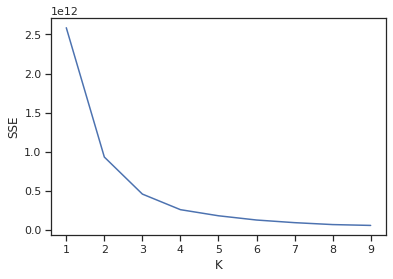

In [139]:
plt.xlabel("K")
plt.ylabel("SSE")
plt.plot(k_rng,sse)

Mencari nilai value dan di plot

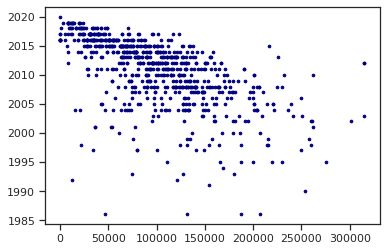

In [150]:
sc = StandardScaler()

f1 = df['odometer'].values
f2 = df['year'].values
X = np.array(list(zip(f1, f2)))
X = sc.fit_transform(X)
plt.scatter(f1,f2, c='navy', s=7)

Euclidean Distance

In [0]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

Menentukan jumlah cluster, dan menentukan koordina centroids

In [118]:
k = 3

C_x = np.random.randint(0, np.max(X), size=k) 
C_y = np.random.randint(0, np.max(X), size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("inisial Centroids")
print(C)

inisial Centroids
[[4. 1.]
 [1. 2.]
 [0. 3.]]


Memvisualisasikan dengan centorids

[[ 1.2251483  -1.3962919 ]
 [ 0.2219047  -0.05442166]
 [-0.9484205   0.85975033]]


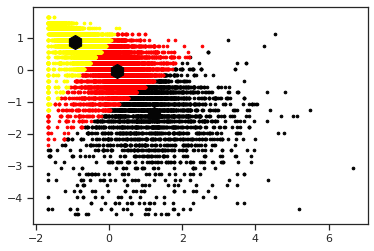

In [119]:
C_old = np.zeros(C.shape)
clusters = np.zeros(len(X))
error = dist(C, C_old, None)

while error != 0:
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    C_old = deepcopy(C)
 
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

colors = ['black', 'red', 'yellow', 'idigo', 'violet', 'wheat']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='h', s=200, c='#050505')


print(C) 

# KESIMPULAN dan ANALISIS

Dalam eksperimen ini yang dimana menggunakan atribu year dan odometer, yang dimana saya membatasa mobil terkahir dimana pada mobil selain tahun 1985 tidak akan dihitung.

Pada hasil eksperimen ini menghasilakan tiga titik centorids yaitu

[1.2251483  -1.3962919]
[ 0.2219047  -0.05442166]
[-0.9484205   0.85975033]

hasil dari 3 titik tersbut menyimpulkan jumlah cluster terbaik dalam atribut yang dipilih.